# Part 1: Exploring Spotify song attributes data

**The Steps:**

In this example we are trying to dig into a sample Spotify dataset that includes song attributes. <br>
The goal is to...

<span style="color:red">A) Create a sample Spotify dataset by merging different spotify-API datasets from Kaggle. </span><br>
<span style="color:red">B) Create a base EDA + analyzing the data with pandas-profiling library + visualization (maybe as GU?) </span> <br>
<span style="color:red">C) Analyze chosen use-cases (Link) for Analysis Examples.</span> <br>
<span style="color:red">D) Implement Decision Tree, Random Forest and Neural Network classifiers. </span><br>

**Tresholds:**

- Import Dataset.
- EDA to visualize data and observe structure.
- Train a classifier via Decision Tree.
- Predict target using the trained classifier.

**The Basic Setup:**

- pandas (pip install pandas) <br>
- numPy (pip install numpy) <br>
- matplotlib (pip install matplotlib) <br>
- scikit-learn (pip install scikit-learn) <br>
- seaborn (pip install seaborn) <br>

**Additional Modules:**

- graphviz (pip install graphviz): Visualize Decision Tree <br>
- pydotplus (pip install pydotplus)
- io
- scipy

**Information about the attributes:**
https://developer.spotify.com/web-api/get-audio-features/

### 0: Preparation.

Importing all necessary libraries.

In [1]:
import pandas as pd # tabular/dict format for work with data via DataFrames and Series.
import numpy as np # Scientific computing package (Arrays) - useful for working with large amounts of huge data.

from matplotlib import pyplot as plt # plotting library - visual part.
import seaborn as sns # style charts - visual part.

from sklearn import tree # machine learning package for python. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Split out training data from test data.
from sklearn.datasets import load_iris

# cell-magic.
# Inline plots in the Notebook. Optional.
%matplotlib inline

## A.1: The First Attempt on a Dataset.

The original data repo contains 7 datasets (.csv files), each representing a Spotify's "All out ..s" type of playlist. Those playlists collect the most popular/iconic songs from the decade. 

For each song, a set of attributes have been reported in order to perform some data analysis. <br>
These attributes are: <br>

- **top genre:** genre of the song
- **year:** year of the song (due to re-releases, the year might not correspond to the release year of the original song)
- **bpm(beats per minute):** beats per minute
- **nrgy(energy):** energy of a song, the higher the value the more energetic the song is
- **dnce(danceability):** the higher the value, the easier it is to dance to this song.
- **dB(loudness):** the higher the value, the louder the song.
- **live(liveness):** the higher the value, the more likely the song is a live recording.
- **val(valence):** the higher the value, the more positive mood for the song.
- **dur(duration):** the duration of the song.
- **acous(acousticness):** the higher the value the more acoustic the song is.
- **spch(speechiness):** the higher the value the more spoken word the song contains.
- **pop(popularity):** the higher the value the more popular the song is.

These 7 datasets are going to be merged into one dataframe == **df_main**

In [2]:
df1 = pd.read_csv("/Users/lf/Desktop/EDA_SPOTIFY/IRONHACK_Midterm/DATA/Spotify Past_Decades_Songs_Attributes/1950.csv")
df2 = pd.read_csv("/Users/lf/Desktop/EDA_SPOTIFY/IRONHACK_Midterm/DATA/Spotify Past_Decades_Songs_Attributes/1960.csv")
df3 = pd.read_csv("/Users/lf/Desktop/EDA_SPOTIFY/IRONHACK_Midterm/DATA/Spotify Past_Decades_Songs_Attributes/1970.csv")
df4 = pd.read_csv("/Users/lf/Desktop/EDA_SPOTIFY/IRONHACK_Midterm/DATA/Spotify Past_Decades_Songs_Attributes/1980.csv")
df5 = pd.read_csv("/Users/lf/Desktop/EDA_SPOTIFY/IRONHACK_Midterm/DATA/Spotify Past_Decades_Songs_Attributes/1990.csv")
df6 = pd.read_csv("/Users/lf/Desktop/EDA_SPOTIFY/IRONHACK_Midterm/DATA/Spotify Past_Decades_Songs_Attributes/2000.csv")
df7 = pd.read_csv("/Users/lf/Desktop/EDA_SPOTIFY/IRONHACK_Midterm/DATA/Spotify Past_Decades_Songs_Attributes/2010.csv")

In [3]:
# merge df1:df7 to create df_main.

df_main1 = pd.concat([df1, df2, df3, df4, df5, df6, df7])

# Check, if the merging process succeeded.

len_singles = str(len(df1) +len(df2) + len(df3) + len(df4) + len(df5) + len(df6) + len(df7))
print("Length of all single dataframes combined: " + len_singles)

len_merge = str(len(df_main1))
print("Length of all merged dataframe: " + len_merge)

if len_singles == len_merge:
    print("Merging completed.") 
else:
    print("ERROR while merging process. Please review.")

Length of all single dataframes combined: 667
Length of all merged dataframe: 667
Merging completed.


## A.2: Optional Data for Example.

The idea of the dataset: An attempt to build a classifier that can predict whether or not I like a song.

Each row represents a song.
There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called "target" which is the label for the song.

Here are the 13 track attributes: <br>
acousticness, danceability, durationms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, timesignature, valence.

In [4]:
# import the optional data for example dataset.

df_main2 = pd.read_csv("/Users/lf/Desktop/EDA_SPOTIFY/IRONHACK_Midterm/DATA/Spotify Past_Decades_Songs_Attributes/data.csv")
df_main2.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


<span style="color:red"> **IN PHASE 2: MERGE BOTH DATASETS INTO HOMOGENEOUS DATASET** </span>

In [5]:
# Get to know the data.

# What type does the df have?
print("DF-TYPE: " + str(type(df_main2)))

# Description of the df.
df_main2.describe()

DF-TYPE: <class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


**What we see:** <br>

For each column pandas provides us with a count of the number of records, the average value, deviation, min and max etc. <br>
We can also see, that the dataset includes 2017 songs. <br>
This method acts as a first overview about the dataset we are handling. <br>

Another helpful method for getting a first overview about the data in my opinion is the .info()-method.<br>
It includes more specific information about the datatypes, number of columns, number of entries and many more...

In [6]:
df_main2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


## A.3: Splitting the dataset

The aim is to split the data in df_main2 into a test set and a training set, because we need to take a certain amount of training data and build up a sort of algorithm in order whether or not the user who entered the **target-values** likes a song.

Then we want to test that train classifier against a completely different set of data of the same type.

The general goal is to reveal a more general structure to the data. Such that we can make a classification based on observations that we've seen before on completely new observations.

In [7]:
# Specify train and test variables.
# Then use train_test_split and use df_main2 as data-input.
# Provide test size = split of the amount of data that should be used for testing purposes.

train, test = train_test_split(df_main2, test_size = 0.15)

In [8]:
# Check if it worked by comparing the size of the training and test data.
print("Training Size: {}; Test size: {}".format(len(train), len(test)))

Training Size: 1714; Test size: 303


**What we see:**<br>

- The size of the training data = 1714.
- The size of the test data = 303.

Another simple way of getting more insight at this point is the .shape property.
This is going to show the number of rows and columns in the data-sets.

In [9]:
train.shape

(1714, 17)

In [10]:
test.shape

(303, 17)

**What we see:**<br>

- The training data has a size of 1714 observations and consists of 17 columns.
- The test data has a size of 303 observations and consists of 17 columns.

So currently the data is split out and put in two separate data frames.
In a next step I am trying to visualize the data. <br>


## B1: Visualization of the data

In [11]:
# Quick Custom Color Palette
custom_colors = [str(input("Please enter the first color hex-code: ")), str(input("Please enter the second color hex-code: "))]
# #5fc3f5 , #1f2433
                                                                        
palette = sns.color_palette(custom_colors)
sns.set_palette(palette)
sns.set_style("white")

Please enter the first color hex-code:  #5fc3f5
Please enter the second color hex-code:  #1f2433


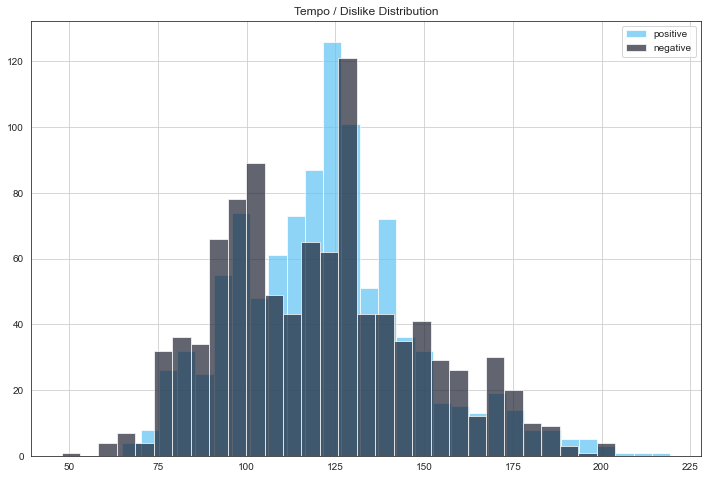

In [12]:
# The first attempt.
# Make histogram that shows if there is a connection between the tempo and the users likeability of the song (target).
# Target value = 1 == User liked the song. Target value = 0 == User disliked the song.
# define variable that represents the figure.
# give it a title.

pos_tempo = df_main2[df_main2['target'] == 1]['tempo']# tempos for the songs the user liked.
# from the dataset where target value on dataset == 1 select the tempo-value.
neg_tempo = df_main2[df_main2['target'] == 0]['tempo']

fig = plt.figure(figsize=(12,8))
plt.title("Tempo / Dislike Distribution")

# Set up histogram.
# alpha = translucent.

pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc='upper right')

**What we see:**<br>

- Most of the songs seem to be within 100 and 150 bpm.
- Songs between 110 and 125 bpm appear to be more liked that disliked by the user.

Besides that there is not too much we can extract from this. <br>

So let's bring the other parameters into play the same way we did with the tempo before:

In [13]:
# Tempo.
pos_tempo = df_main2[df_main2['target'] == 1]['tempo']
neg_tempo = df_main2[df_main2['target'] == 0]['tempo']

# Danceability.
pos_dance = df_main2[df_main2['target'] == 1]['danceability']
neg_dance = df_main2[df_main2['target'] == 0]['danceability']

# Duration.
pos_duration = df_main2[df_main2['target'] == 1]['duration_ms']
neg_duration = df_main2[df_main2['target'] == 0]['duration_ms']

# Loudness.
pos_loudness = df_main2[df_main2['target'] == 1]['loudness']
neg_loudness = df_main2[df_main2['target'] == 0]['loudness']

# Speechiness.
pos_speechiness = df_main2[df_main2['target'] == 1]['speechiness']
neg_speechiness = df_main2[df_main2['target'] == 0]['speechiness']

# Valence.
pos_valence = df_main2[df_main2['target'] == 1]['valence']
neg_valence = df_main2[df_main2['target'] == 0]['valence']

# Energy.
pos_energy = df_main2[df_main2['target'] == 1]['energy']
neg_energy = df_main2[df_main2['target'] == 0]['energy']

# Acousticness.
pos_acousticness = df_main2[df_main2['target'] == 1]['acousticness']
neg_acousticness = df_main2[df_main2['target'] == 0]['acousticness']

# Key.
pos_key = df_main2[df_main2['target'] == 1]['key']
neg_key = df_main2[df_main2['target'] == 0]['key']

# Instrumentalness
pos_instrumentalness = df_main2[df_main2['target'] == 1]['instrumentalness']
neg_instrumentalness = df_main2[df_main2['target'] == 0]['instrumentalness']

<ipython-input-14-240a0a1f144d>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(331)


<AxesSubplot:title={'center':'Danceability <-> Like (Distribution)'}, xlabel='Danceability', ylabel='Count'>

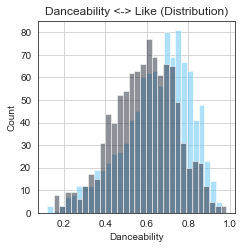

In [14]:
# Graph all of these in a single graph using subplots wwith matplotlib.

fig2 = plt.figure(figsize=(12, 12))

# axis 1 and axis 2 correspond to like/dislikes.

# Danceability.
ax3 = fig2.add_subplot(331) # in a 3/3 grid, location 1 = 331
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count') # number of liked / disliked songs within guessability-range by each bin.
ax3.set_title('Danceability <-> Like (Distribution)')
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)

**What we see:**<br>

- There seems to be some sort of preference for danceability feature.
- This means that it seems like there is a slight bias towards disliking songs with lower danceability index and a slight preference for songs with higher danceability index.

Now we want to get this kind of amazing insights into the data for the rest of the parameters:

<ipython-input-15-c6ab2fbf8bf4>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(331)
<ipython-input-15-c6ab2fbf8bf4>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax6 = fig2.add_subplot(332)
<ipython-input-15-c6ab2fbf8bf4>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

<AxesSubplot:title={'center':'Instrumentalness <-> Like (Distribution)'}, xlabel='Instrumentalness', ylabel='Count'>

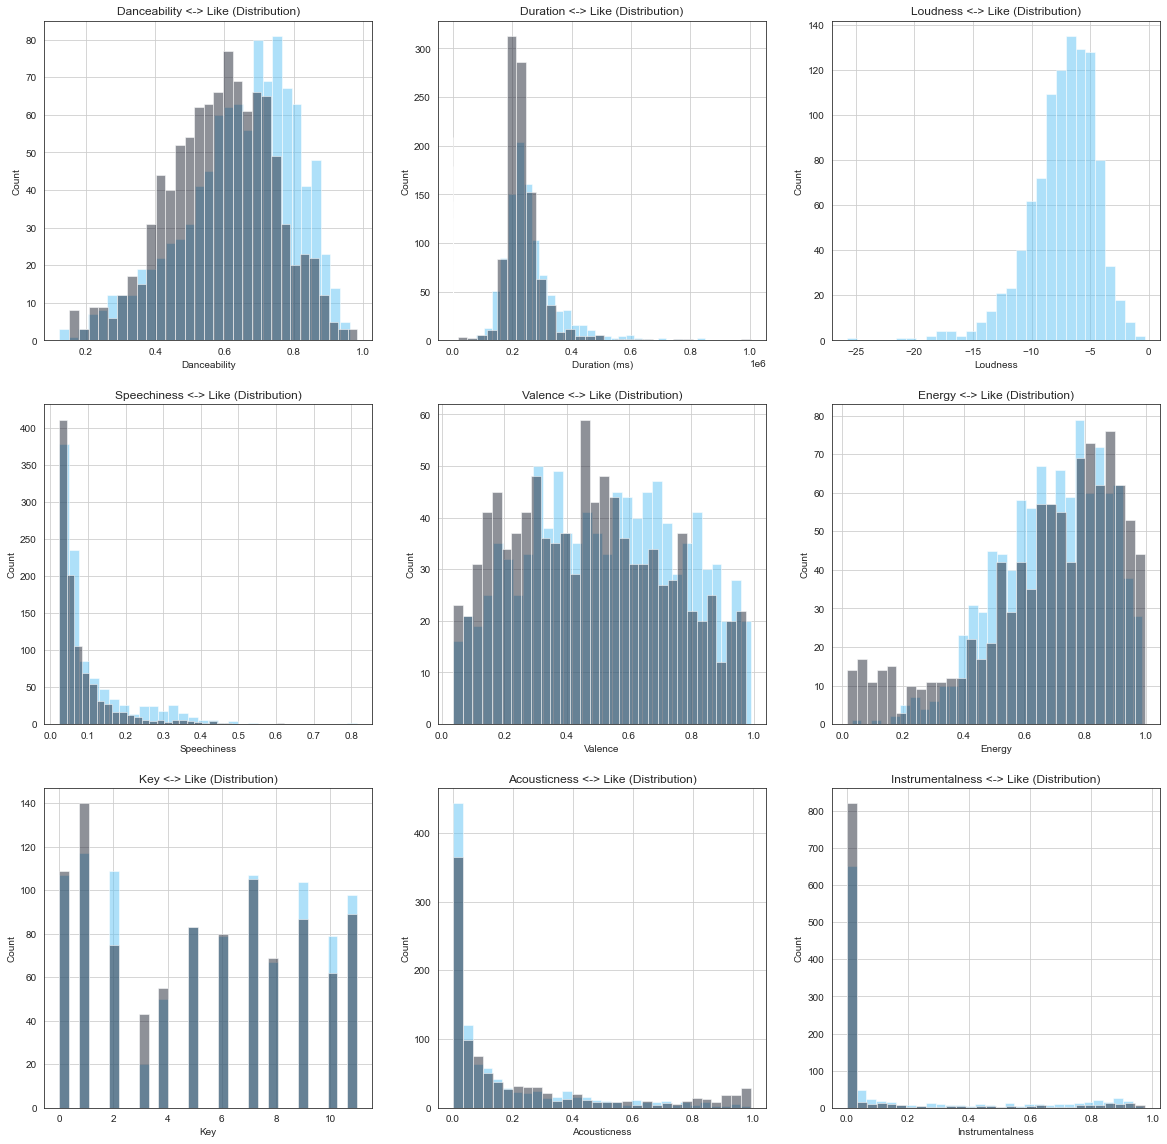

In [15]:
# Same procedure as Danceability above.

fig2 = plt.figure(figsize=(20,20))

# Danceability.
ax3 = fig2.add_subplot(331) 
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Danceability <-> Like (Distribution)')
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)

# Duration.
ax5 = fig2.add_subplot(332) 
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title('Duration <-> Like (Distribution)')
pos_duration.hist(alpha=0.5, bins=30)
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)

# Loudness.
ax7 = fig2.add_subplot(333) 
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Loudness <-> Like (Distribution)')
pos_loudness.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(332)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness.
ax9 = fig2.add_subplot(334) 
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Speechiness <-> Like (Distribution)')
pos_speechiness.hist(alpha=0.5, bins=30)
ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence.
ax11 = fig2.add_subplot(335) 
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Valence <-> Like (Distribution)')
pos_valence.hist(alpha=0.5, bins=30)
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy.
ax13 = fig2.add_subplot(336) 
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Energy <-> Like (Distribution)')
pos_energy.hist(alpha=0.5, bins=30)
ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Key.
ax17 = fig2.add_subplot(337) 
ax17.set_xlabel('Key')
ax17.set_ylabel('Count')
ax17.set_title('Key <-> Like (Distribution)')
pos_key.hist(alpha=0.5, bins=30)
ax18 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Acousticness.
ax15 = fig2.add_subplot(338) 
ax15.set_xlabel('Acousticness')
ax15.set_ylabel('Count')
ax15.set_title('Acousticness <-> Like (Distribution)')
pos_acousticness.hist(alpha=0.5, bins=30)
ax16 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness.
ax19 = fig2.add_subplot(339) 
ax19.set_xlabel('Instrumentalness')
ax19.set_ylabel('Count')
ax19.set_title('Instrumentalness <-> Like (Distribution)')
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax20 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

**What we see:**<br>

- #Key: 12 Different Keys, 0 = C after standard pitch class notations.
- #Key: ["Link"](https://en.wikipedia.org/wiki/Pitch_class)
- The user has a slight bias for liking music with a higher danceability-value (f.ex).
- Similar types of structures for each of the different attributes can be found.

This means, that the users preference for the songs which have these attributes actually has some structure.

**Take a moment to breath** <br>
What we achieved so far: <br>
- A very brief EDA of the Song Attributes Data Set.<br>

To recap:<br>
The dataset contained from a list of a random users songs that he/she provided. This dataset was labeled with a target value of 0 or 1 depending on whether the user disliked / liked the songs. <br>

The features of the dataset were a number of different attributes that were either discreet values (f.ex. key that the song was in) or continuious values (f.ex. duration of the song). <br>

We then went through a basic description of the dataset and produced a series of histograms, that were split on the target-value (liking / disliking a song) and the value-distribution for the different features. <br>

In [16]:
## MORE ANALYSIS HERE!!

<AxesSubplot:>

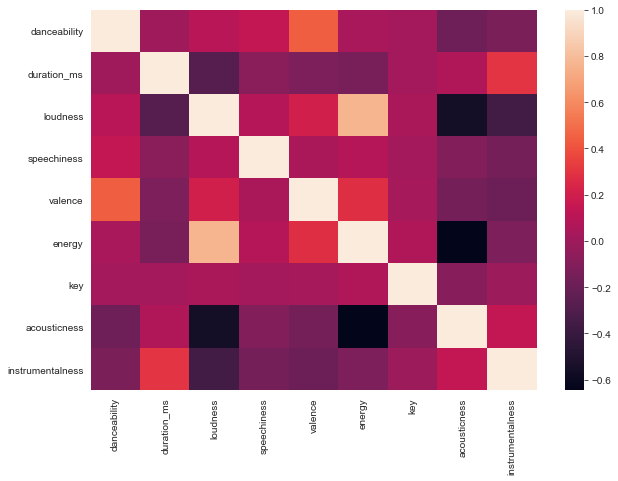

In [17]:
# So first let us check how well the given features complement each other in our sample-data.
# first we are unifying the data and using the .corr()-method.
uniform_data = df_main2[["danceability", "duration_ms", "loudness", "speechiness", "valence", "energy", "key", "acousticness", "instrumentalness"]].corr()

# Then we are plotting the solutions to a sns.heatmap.
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(uniform_data)

In [18]:
# It looks like there is a hight correlation for:
# danceability - valence
# duration_ms - instrumentalness
# energy - valence
# ...

In [19]:
# Since our previous dataset is pretty specific and I am more interested in some more insights, 
# I'd like to continue with another one to get even more insights.
# So for the next analysis-steps we are combining 7 data-sets from 1950-2010 into one df.
df_main1.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


In [20]:
# So this dataset mainly contains the known parameters (simply renamed).
# There is no target column, since there has not been a target for likeability set yet.
# It also has information about the top genre, year etc. additionaly.

In [21]:
print("Length of DF: ", len(df_main1))

Length of DF:  667


In [22]:
df_main1.describe()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,48.718141,1994.967016,119.121439,61.394303,60.325337,-8.356822,18.188906,57.311844,224.002999,29.917541,6.179910,63.349325
std,28.414748,17.771374,25.030827,21.703963,15.051583,3.659509,14.380929,24.400412,59.742591,28.865081,6.191199,13.725845
min,1.000000,1945.000000,62.000000,6.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,24.000000,1980.000000,101.500000,45.000000,51.000000,-11.000000,9.000000,39.000000,185.000000,6.000000,3.000000,56.000000
50%,48.000000,1998.000000,120.000000,64.000000,62.000000,-8.000000,13.000000,58.000000,218.000000,19.000000,4.000000,66.000000
75%,72.000000,2010.000000,134.000000,79.000000,71.000000,-6.000000,24.000000,78.000000,254.000000,52.000000,6.000000,73.500000
max,105.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,94.000000


<AxesSubplot:xlabel='year', ylabel='pop'>

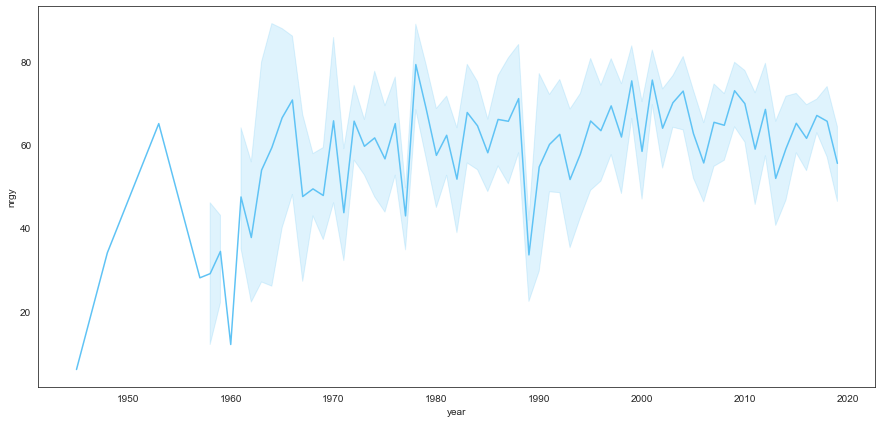

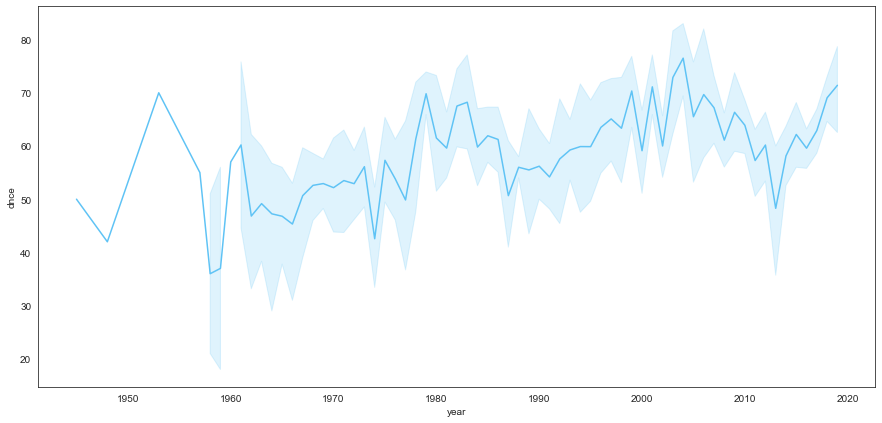

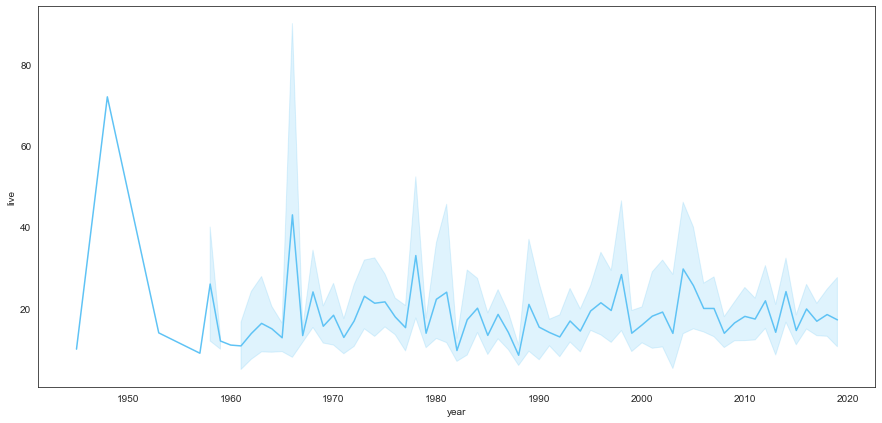

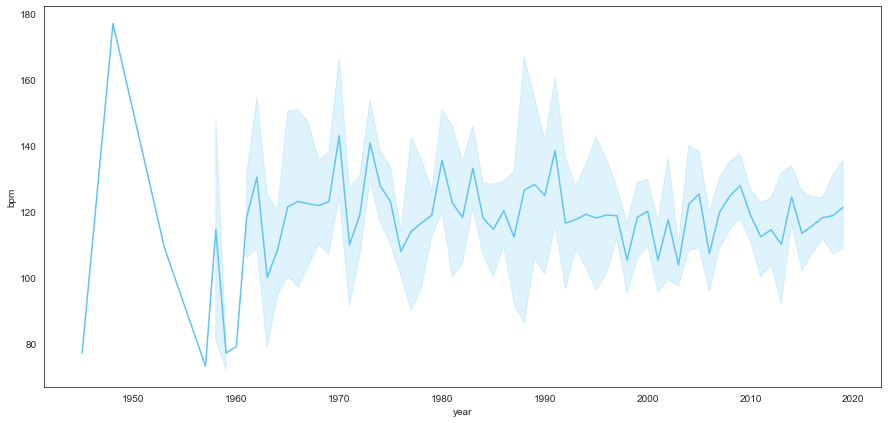

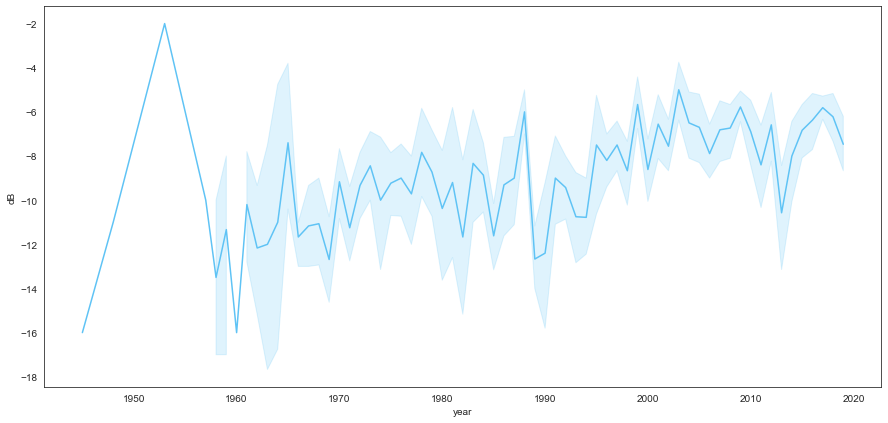

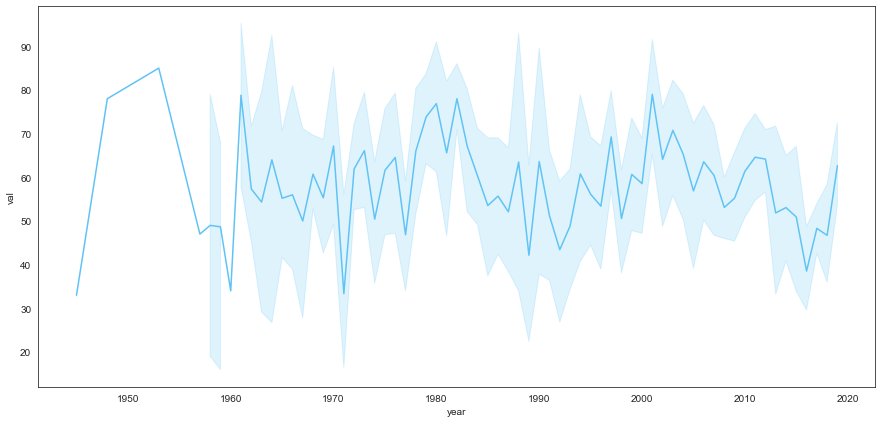

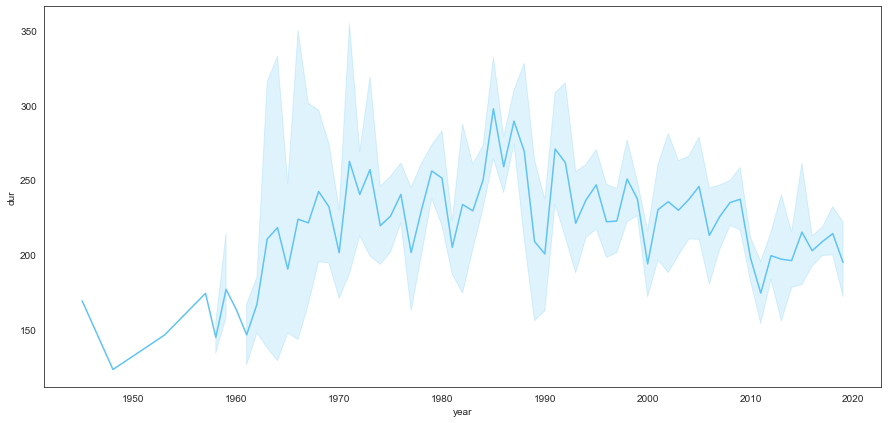

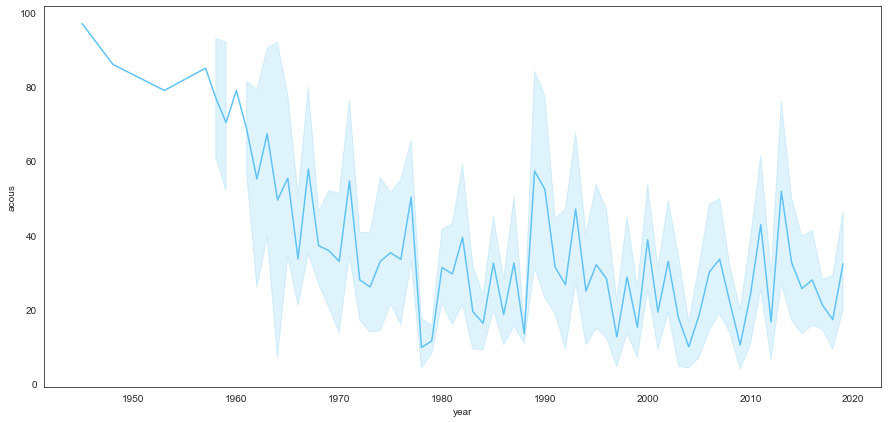

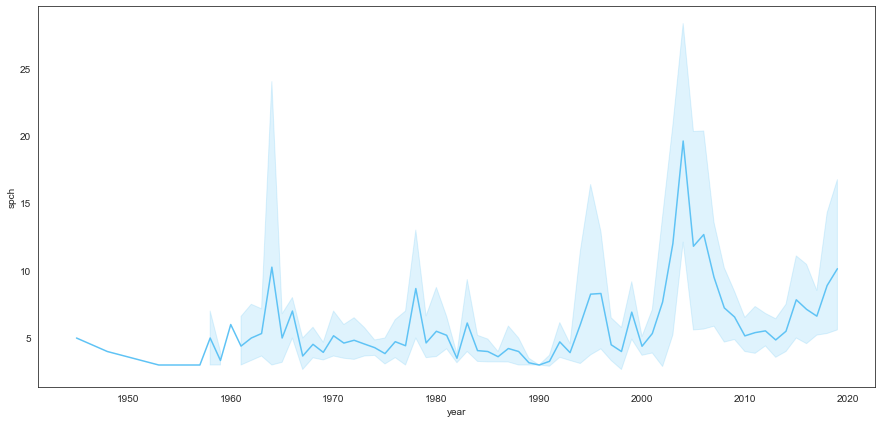

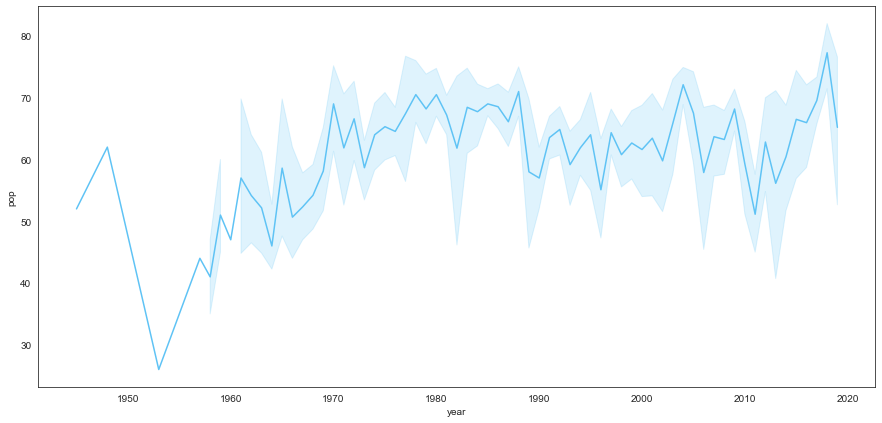

In [23]:
fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="nrgy", data=df_main1, ax=ax)

fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="dnce", data=df_main1, ax=ax)

fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="live", data=df_main1, ax=ax)

fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="bpm", data=df_main1, ax=ax)

fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="dB", data=df_main1, ax=ax)

fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="val", data=df_main1, ax=ax)

fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="dur", data=df_main1, ax=ax)

fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="acous", data=df_main1, ax=ax)

fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="spch", data=df_main1, ax=ax)

fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="pop", data=df_main1, ax=ax)

<AxesSubplot:xlabel='year', ylabel='nrgy'>

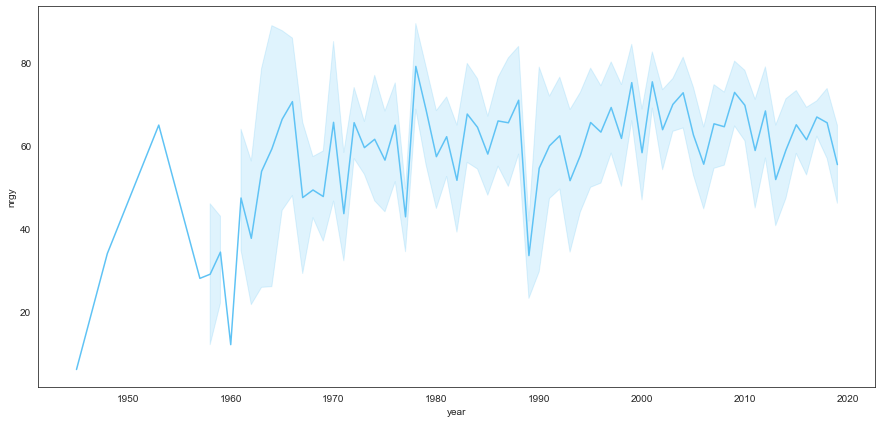

In [24]:
fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="nrgy", data=df_main1, ax=ax)

In [25]:
# Although the energy level of the songs is increasing through time,
# there are time spans where the energy wasn't that important. 
# Interesting pattern: End of 1960, End of 1970, End of 1980, End of 1990 there have always been drastic drops.

<AxesSubplot:xlabel='year', ylabel='acous'>

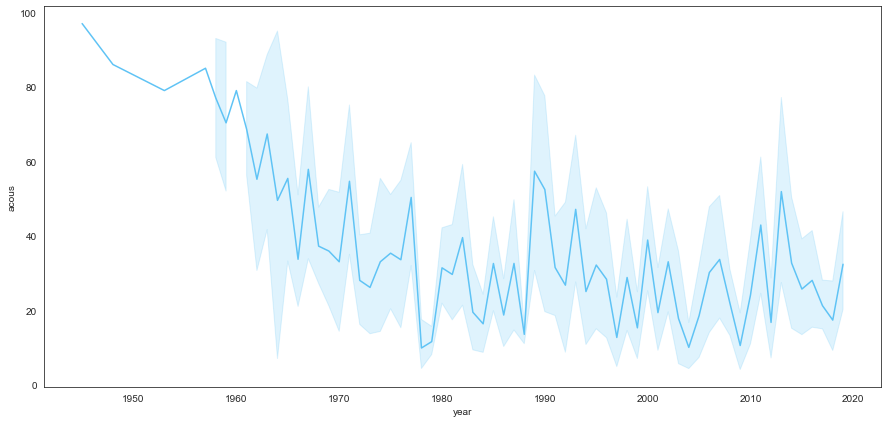

In [26]:
fig, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x="year", y="acous", data=df_main1, ax=ax)

In [27]:
# Another example is the rate of acousticness through the years. 
# It seems like there is a steep decline after the 1960s.
# This might mean that music makers nowadays are more inclined towards the electronic side of music.

In [28]:
# So let's take a look to the artists in the dataset.
# Q1: Which artist has worked on most songs in the dataset?
# To answer this I am going to create a bar plot of the artists with most number of songs.
# To do so, I will be using my third dataset. It includes data_by_artist.

data_artist = pd.read_csv("/Users/lf/Desktop/EDA_SPOTIFY/IRONHACK_Midterm/DATA/Spotify Past_Decades_Songs_Attributes/data_by_artist.csv")
data_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [29]:
print("Length DF_artists: ", len(data_artist))

Length DF_artists:  28680


/Users/lf/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Artists'), Text(0, 0.5, 'Number of Songs')]

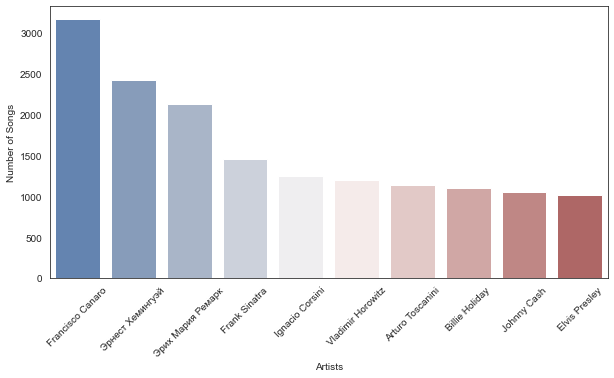

In [30]:
# As we can see, it again is our basic framework with known parameters.
# Difference: There is a count-column.

top_artists_by_songs=data_artist[['artists', 'count']].sort_values('count', ascending=False)[0:10]

plt.figure(figsize=(10,5))
chart=sns.barplot('artists', 'count', data=top_artists_by_songs, palette='vlag')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set(xlabel='Artists', ylabel='Number of Songs')

In [31]:
# It seems like musicians in the past used to make a lot of songs. 
# Francisco Canaro even passed the treshold of 3000 songs.

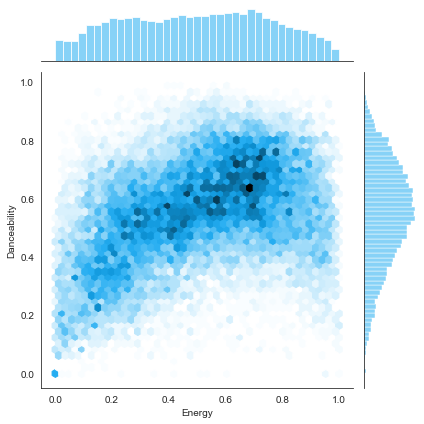

In [32]:
# Since there are many examples to get out of those plots, I will only take a view into work now.
# Q1: What is the relation between danceability and energy?

sns.jointplot(x='energy', y='danceability', data=data_artist[['energy', 'danceability']], kind="hex").set_axis_labels("Energy", "Danceability")

In [33]:
# It seems like energy and danceability are highly correlated. 
# Most of the songs have an energy between .6 and .8 index. 

In [34]:
# So let's check, who is making the music with the highest danceability indexes.
# Then let's do the same for the energy indexes and see, if there are any patterns.

data_artist[['artists', 'danceability']].sort_values('danceability', ascending=False)[0:20]

,artists,danceability
27871,Young Bo,0.986
27874,Young Boss,0.986
10672,ITSOKTOCRY,0.985
87,347aidan,0.980
985,Ambjaay,0.978
14606,Lil Ronny Motha F,0.975
20061,Punkin Machine,0.975
10772,Impacto Mc,0.975
4176,Championxiii,0.974
13003,KBFR,0.974


In [35]:
data_artist[['artists', 'energy']].sort_values('energy', ascending=False)[0:20]

,artists,energy
5157,Creatress,1.000000
17922,Nature Sounds Nature Music,0.999333
26356,Tranquility Spree,0.999000
25458,The Relaxing Sounds of Swedish Nature,0.999000
14838,Lluvia PQ,0.999000
23778,Swell Maps,0.999000
15457,Lullaby Waves,0.999000
25944,Thunderbound Productions,0.999000
28043,Zen Music Garden,0.999000
3846,Caramella Girls,0.998500


In [36]:
# 

In [37]:
# Now that we had a look at the artist dataset, we are ready to switch to another one.
# Q1: What are the most popular genres?

data_genre=pd.read_csv("/Users/lf/Desktop/EDA_SPOTIFY/IRONHACK_Midterm/DATA/Spotify Past_Decades_Songs_Attributes/data_by_genres.csv")
data_genre.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [38]:
# Since there is a popularity column in this dataset, we are able to use this to achieve the task.
data_genre['genres']=[i.capitalize() for i in data_genre['genres']]
data_genre[['genres', 'popularity']].sort_values('popularity', ascending=False)[0:20]

,genres,popularity
237,Basshall,80.666667
2778,Turkish edm,80.000000
2533,South african house,80.000000
2755,Trap venezolano,80.000000
46,Alberta hip hop,78.500000
536,Chinese electropop,78.500000
37,Afroswing,77.312500
31,Afro soul,77.000000
2383,Russian dance,77.000000
1239,Guaracha,77.000000


In [39]:
# It seems like the most popular Genre is Basshall.

In [40]:
# So now we are bringing in our biggest dataset yet.
df_data = pd.read_csv("/Users/lf/Desktop/EDA_SPOTIFY/IRONHACK_Midterm/DATA/Spotify Past_Decades_Songs_Attributes/spotify_160_db.csv")
df_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [41]:
len_data = len(df_data)
print("Lenght df-data: ", len_data)

Lenght df-data:  169909


In [51]:
df_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [52]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

**Observation** - There are no nulls in the dataset.

In [54]:
## Data Cleaning

# The duration_ms needs to be cleaned first by converting the ms in min.

df_data['duration_min'] = df_data['duration_ms']/60000
df_data['duration_min'] = df_data['duration_min'].round(2)

df_data['duration_min'].head()

0     2.64
1     4.70
2     1.74
3     3.01
4    11.46
Name: duration_min, dtype: float64

In [55]:
#Remove Square Brackets from the artist-df.

df_data["artists"]=df_data["artists"].str.replace("[", "")
df_data["artists"]=df_data["artists"].str.replace("]", "")
df_data["artists"]=df_data["artists"].str.replace("'", "")

df_data.head()

<ipython-input-55-17bf4756196e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_data["artists"]=df_data["artists"].str.replace("[", "")
<ipython-input-55-17bf4756196e>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_data["artists"]=df_data["artists"].str.replace("]", "")


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_min
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,2.64
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,4.70
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,1.74
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,3.01
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,11.46


In [57]:
#Add Song decade column in the dataset
df_data['Song Decade'] = None

df_data.loc[(df_data['year'] >= 1920) & (df_data['year'] < 1930), 'Song Decade'] = '1920s'
df_data.loc[(df_data['year'] >= 1930) & (df_data['year'] < 1940), 'Song Decade'] = '1930s'
df_data.loc[(df_data['year'] >= 1940) & (df_data['year'] < 1950), 'Song Decade'] = '1940s'
df_data.loc[(df_data['year'] >= 1950) & (df_data['year'] < 1960), 'Song Decade'] = '1950s'
df_data.loc[(df_data['year'] >= 1960) & (df_data['year'] < 1970), 'Song Decade'] = '1960s'
df_data.loc[(df_data['year'] >= 1970) & (df_data['year'] < 1980), 'Song Decade'] = '1970s'
df_data.loc[(df_data['year'] >= 1980) & (df_data['year'] < 1990), 'Song Decade'] = '1980s'
df_data.loc[(df_data['year'] >= 1990) & (df_data['year'] < 2000), 'Song Decade'] = '1990s'
df_data.loc[(df_data['year'] >= 2000) & (df_data['year'] < 2010), 'Song Decade'] = '2000s'
df_data.loc[(df_data['year'] >= 2010) & (df_data['year'] < 2020), 'Song Decade'] = '2010s'
df_data.loc[(df_data['year'] >= 2020) & (df_data['year'] < 2030), 'Song Decade'] = '2020s'

df_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_min,Song Decade
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,...,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,2.64,1920s
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,...,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,4.70,1920s
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,...,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,1.74,1920s
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,...,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,3.01,1920s
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,...,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,11.46,1920s


In [58]:
# Drop Duplicates
df_data.duplicated().any().sum()

0

In [59]:
# It seems like there are no duplicates.
# But while going through the data I already recognized at least one song (above) that is present twice.
# So let's check.
df_data[(df_data['artists'] == "Billie Holiday") & (df_data['name']== "No Regrets - Take 1")]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_min,Song Decade
79322,0.93,Billie Holiday,0.721,155667,0.186,0,65YsrE85spoEzDa3O8iCPT,0.000145,3,0.351,...,1,No Regrets - Take 1,17,1933,0.0458,129.452,0.77,1933,2.59,1930s
79333,0.93,Billie Holiday,0.721,155667,0.186,0,4FU5KzT1MaIuIV4thAY870,0.000145,3,0.351,...,1,No Regrets - Take 1,15,1933,0.0458,129.452,0.77,1933,2.59,1930s


In [60]:
# It seems like the duplicates are not recognized due to the unique id of each song.
# So what happens, when we are removing this column and check for duplicates again?

df_data = df_data.drop(labels=['id', 'release_date'], axis=1)
df_data.shape

(169909, 19)

In [61]:
df_data.duplicated().sum()

607

In [62]:
# After the Unique features removal, there are 628  duplicates found in the dataset which needs to be removed.
# So let's remove them.

df_data = df_data[~df_data.duplicated()==1]
df_data.shape

(169302, 19)

In [63]:
df_data.duplicated().sum()

0

In [64]:
# Awesome. Now all duplicates are dropped.
df_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,duration_min,Song Decade
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928,2.64,1920s
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928,4.70,1920s
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928,1.74,1920s
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928,3.01,1920s
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,11.46,1920s


In [65]:
# Let's add in a little example where we check the sum of the duration to find out, how long it would take to listen to all the songs in the df_data.
df_data.duration_min.sum()/(24*365*60)

1.242466400304414

In [66]:
# The data has 1.24 years of continous listening. In other words it will take 1.24 years for you to listen to all the songs in the df_data.

/Users/lf/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lf/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lf/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

<AxesSubplot:xlabel='mode', ylabel='Density'>

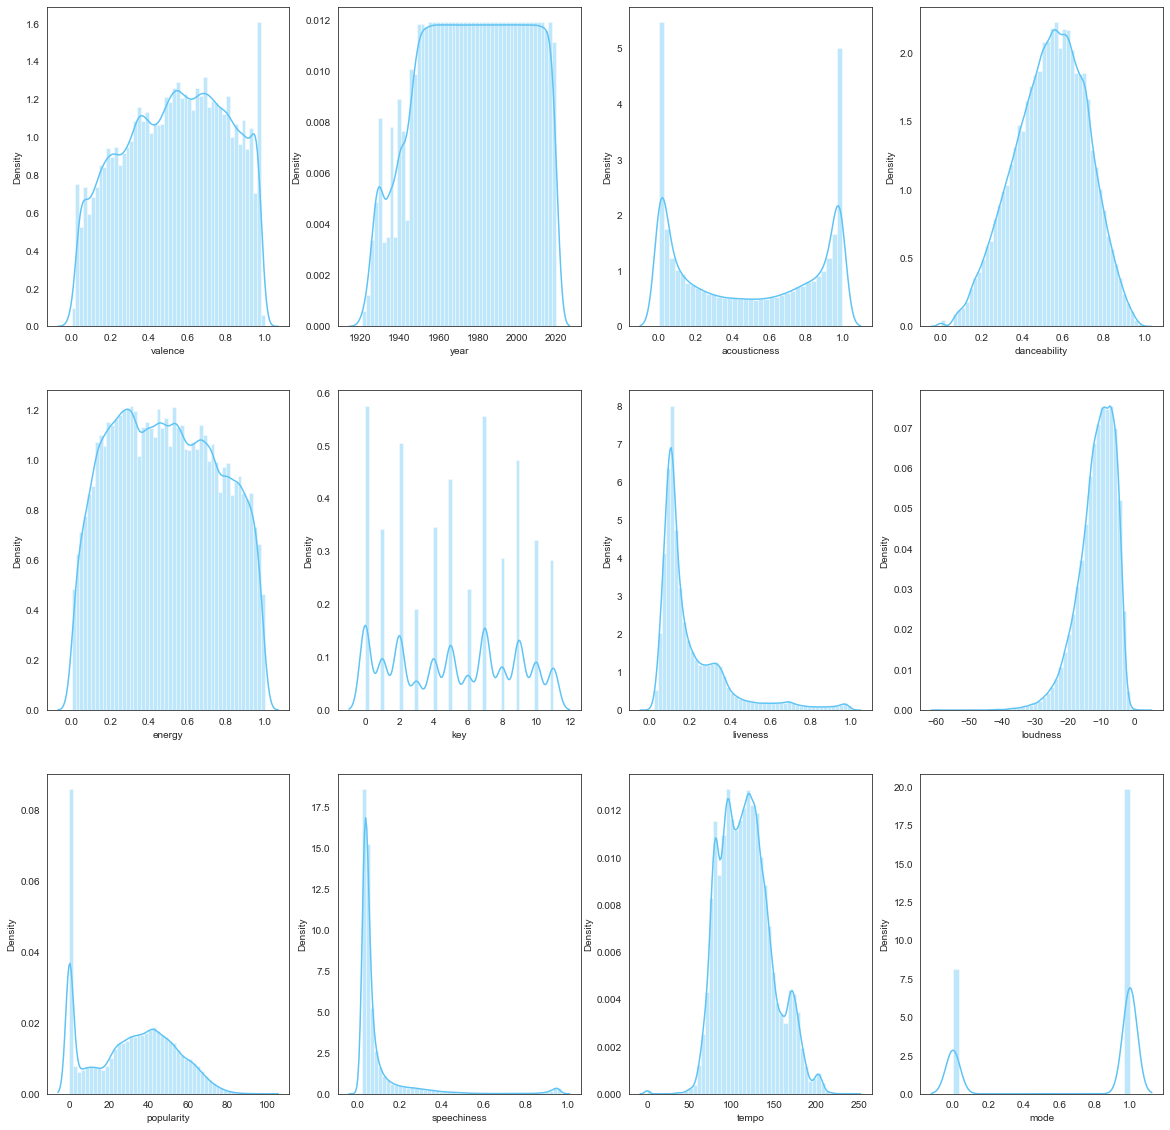

In [68]:
# Now that we cleaned the data, let's start visualizing.

#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(df_data['valence'],ax=ax[0,0])
sns.distplot(df_data['year'],ax=ax[0,1])
sns.distplot(df_data['acousticness'],ax=ax[0,2])
sns.distplot(df_data['danceability'],ax=ax[0,3])

#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(df_data['energy'],ax=ax[1,0])
sns.distplot(df_data['key'],ax=ax[1,1])
sns.distplot(df_data['liveness'],ax=ax[1,2])
sns.distplot(df_data['loudness'],ax=ax[1,3])
sns.distplot(df_data['popularity'],ax=ax[2,0])
sns.distplot(df_data['speechiness'],ax=ax[2,1])
sns.distplot(df_data['tempo'],ax=ax[2,2])
sns.distplot(df_data['mode'],ax=ax[2,3])

<AxesSubplot:>

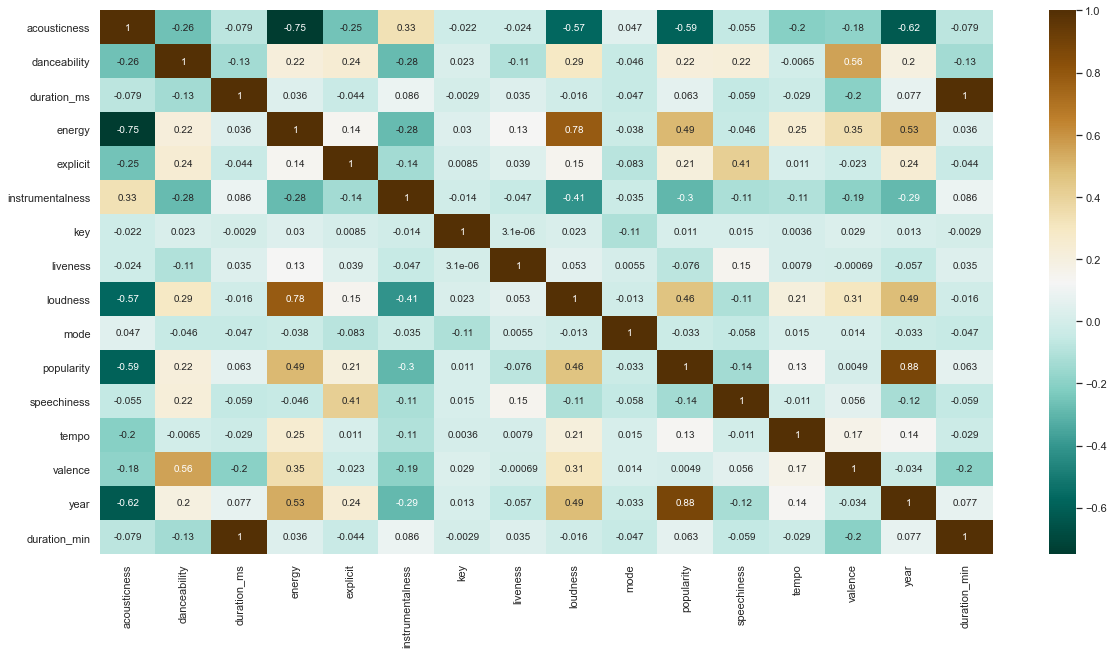

In [69]:
# Correlation Map.
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = df_data.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":10})

- Acousticness is highly negatively correlated with energy, loudness, and year.

- Acousticness seems to be uncorrelated with popularity.

- Loudness and energy are highly correlated. This makes some sense, as energy is  influenced by the volume at which the music is being played.

- Energy seems to influence song’s popularity. Many popular songs are energetic, though not necessarily dance songs. Because the correlation here is not too high, low energy songs do have some potential to be more popular.

- Valence and danceability are highly correlated. (Dance songs are usually happier and in a major key)

- Popularity is highly correlated with the year released. This makes sense as the Spotify algorithm which makes this decision generates its “popularity” metric by not just how many streams a song receives but also how recent those streams are.

As an artist, this shows us, that, if the goal is to write a popular song, a combination of high energy including electronical sounds have the best chance of being popular.

/Users/lf/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

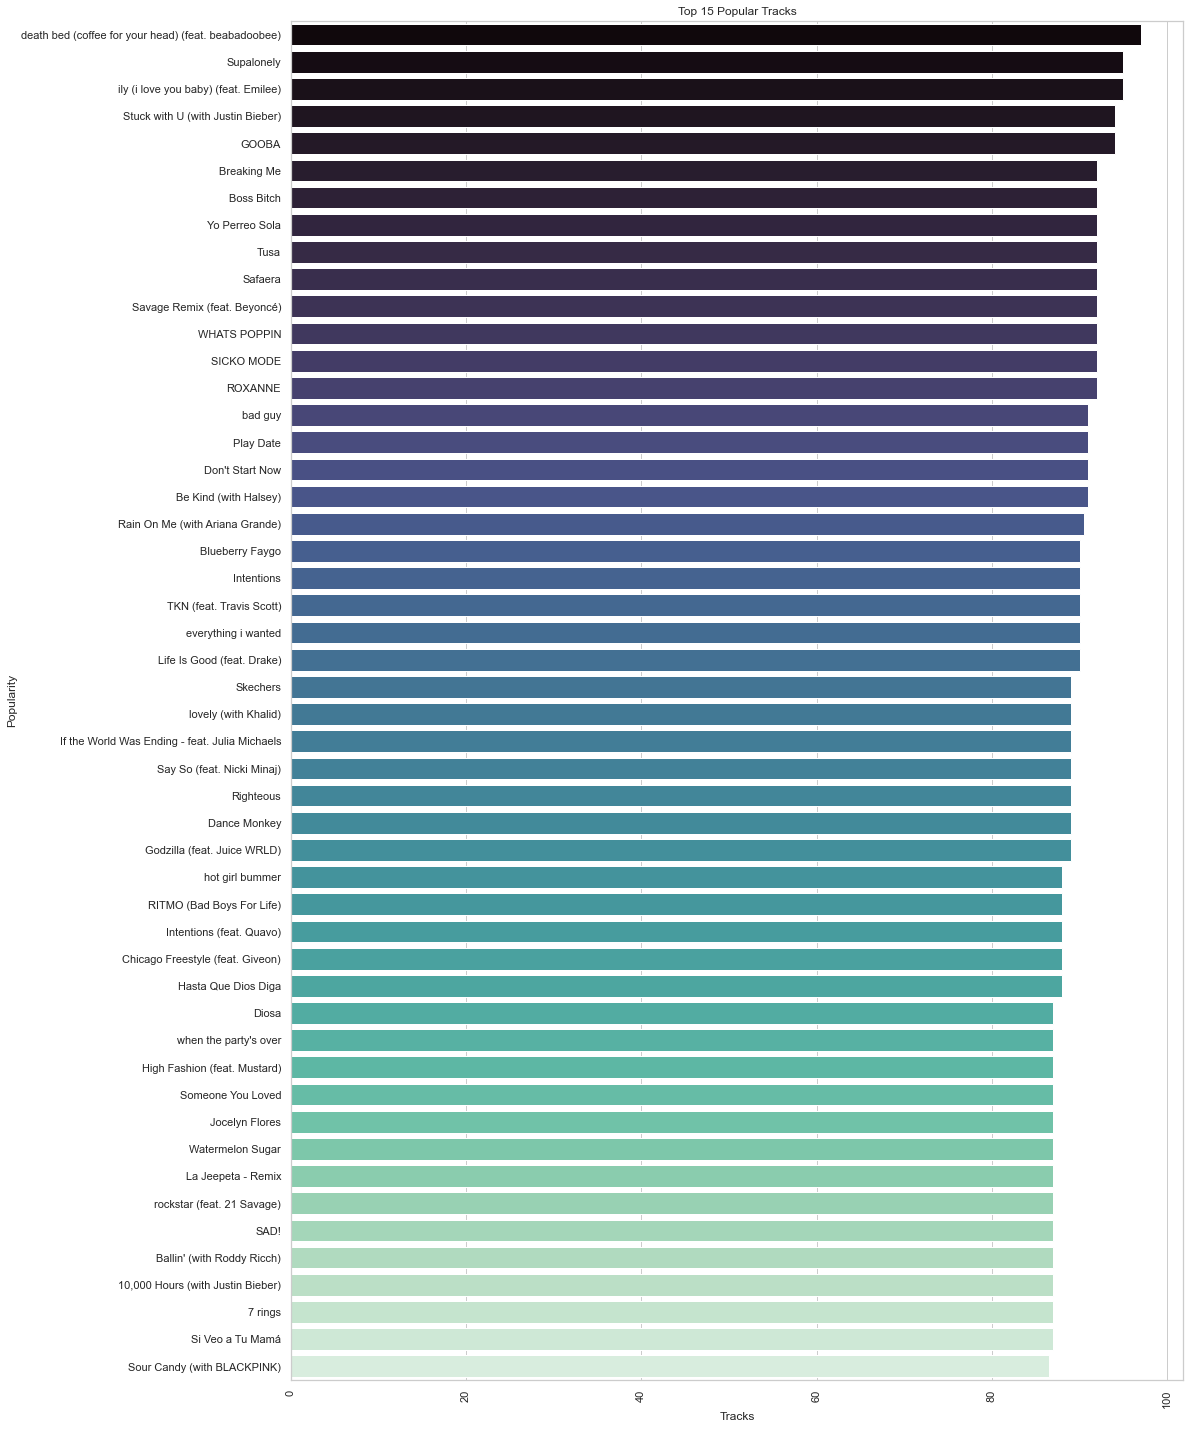

In [70]:
# Step 2: Most popular tracks

fig, axis = plt.subplots(figsize = (16,25))
popular = df_data.groupby("name")['popularity'].mean().sort_values(ascending=False).head(50)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [71]:
# Individual Popularity Scores for each track.
df_data.groupby("name")['popularity'].mean().sort_values(ascending=False).head(50)

name
death bed (coffee for your head) (feat. beabadoobee)    97.0
Supalonely                                              95.0
ily (i love you baby) (feat. Emilee)                    95.0
Stuck with U (with Justin Bieber)                       94.0
GOOBA                                                   94.0
Breaking Me                                             92.0
Boss Bitch                                              92.0
Yo Perreo Sola                                          92.0
Tusa                                                    92.0
Safaera                                                 92.0
Savage Remix (feat. Beyoncé)                            92.0
WHATS POPPIN                                            92.0
SICKO MODE                                              92.0
ROXANNE                                                 92.0
bad guy                                                 91.0
Play Date                                               91.0
Don't Start Now    

In [72]:
# It seems like popularity is heavily dependent on the timeframe. 
# As we see, death bed (coffee for your head) has the highest popularity rating by this graph, but was released on 01/04/2020. 
# Using this data in our regression will give us a snapshot as to the attributes popular songs have for mid-2020, but may not work or become less relevant once we get further from this date.

/Users/lf/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

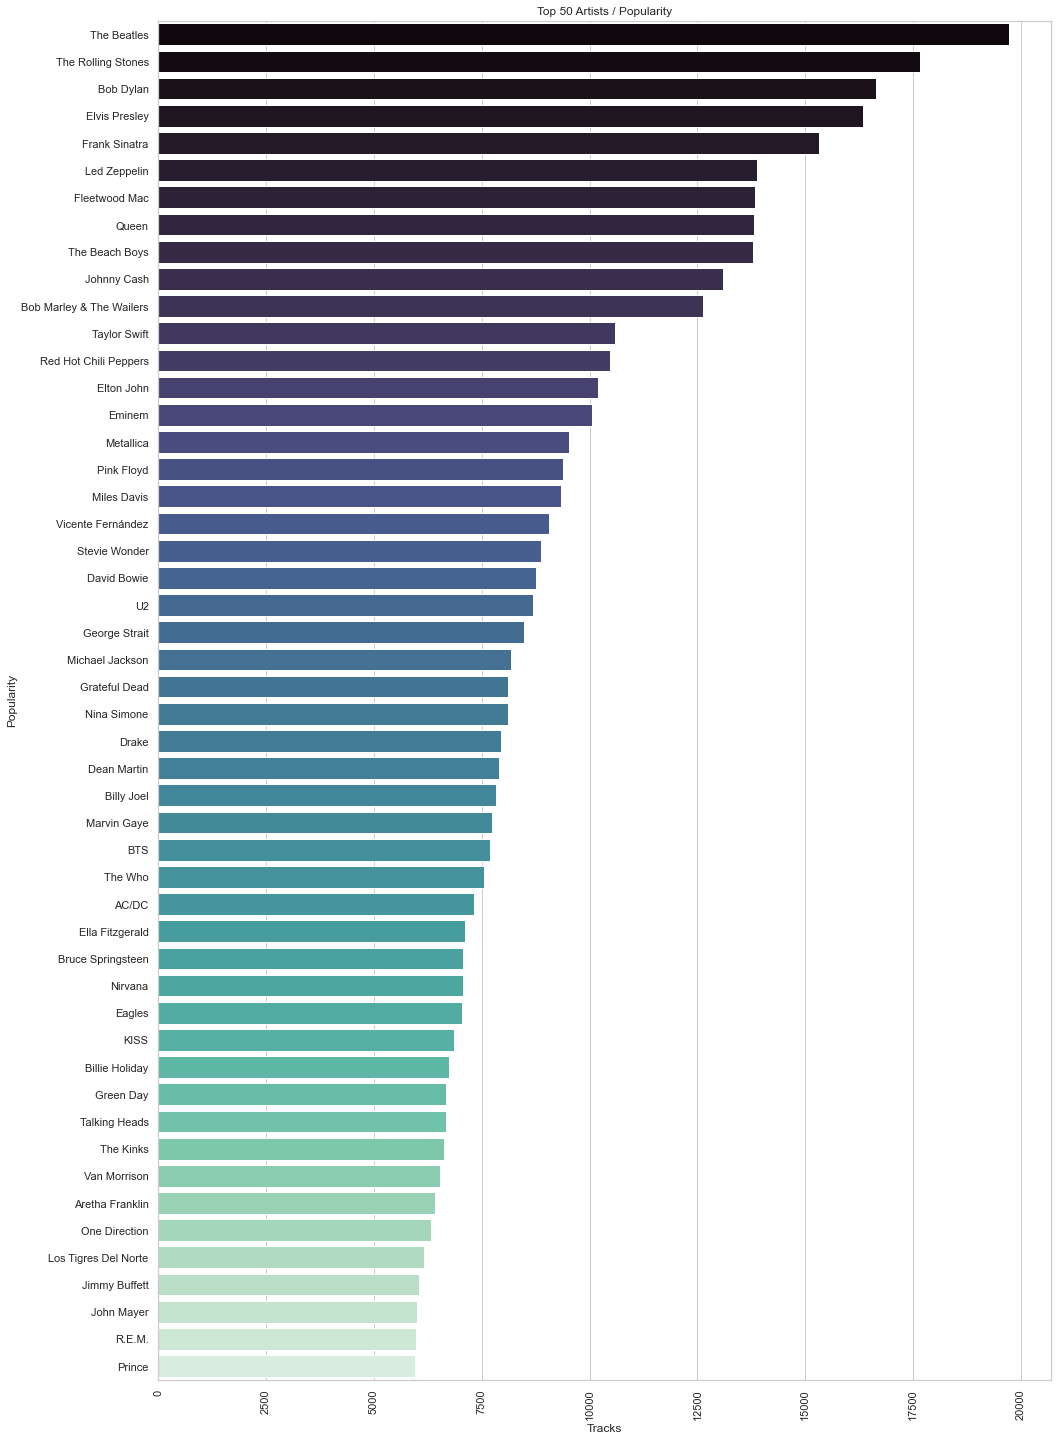

In [73]:
# Step 3: Most Popular Artists

fig, axis = plt.subplots(figsize = (16,25))
popular = df_data.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:50]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 50 Artists / Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [74]:
# Top 5: The Beatles, The Rolling Stones, Bob Dylan, Elvis Presley, Frank Sinatra.

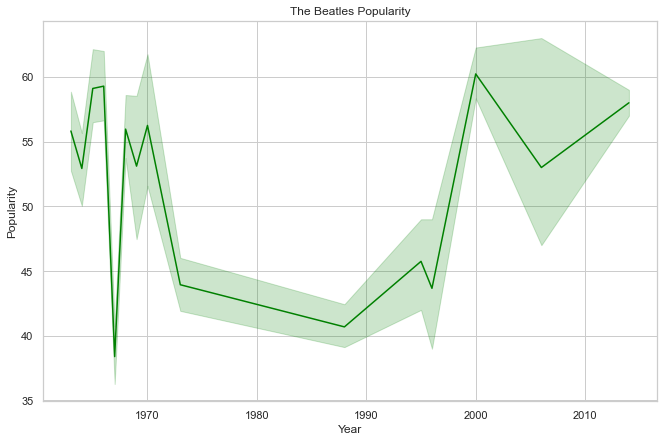

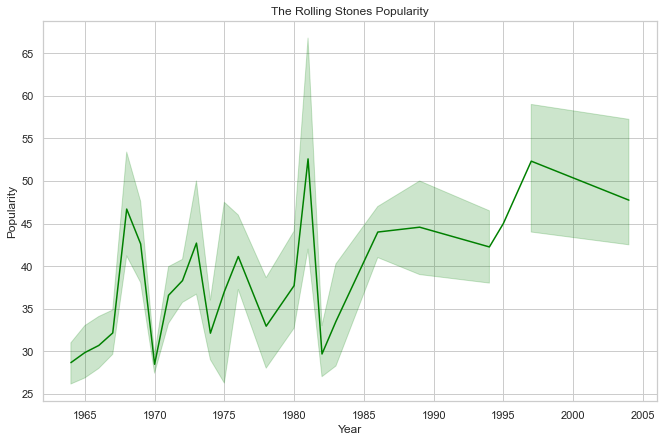

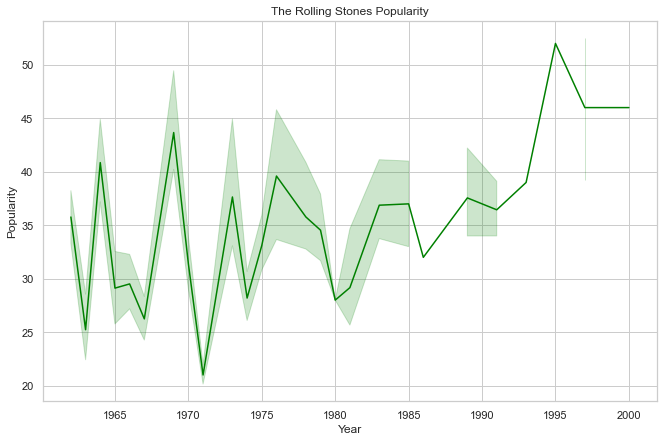

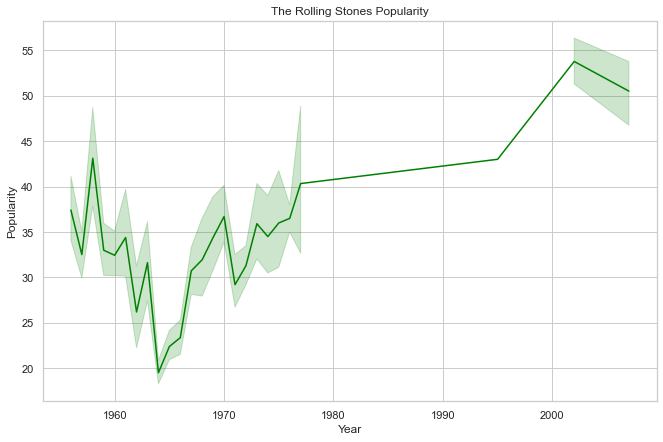

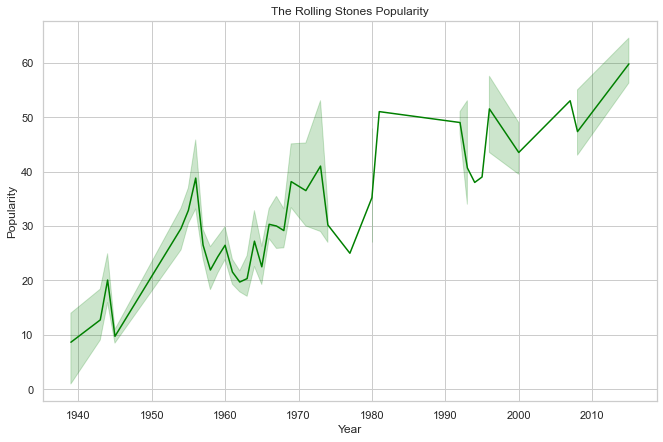

In [75]:
# So let's check those artists through time and generate their popularity trends.

# visualize the popularity of The Beatles songs over the year
Beatles = df_data[df_data['artists'] == 'The Beatles']
plt.rcParams['figure.figsize'] = (11,7)

# line plot passing x,y
sns.lineplot(x='year', y='popularity', data=Beatles, color='green')

# Labels
plt.title("The Beatles Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

# visualize the popularity of The Rolling Stones songs over the year
TRS = df_data[df_data['artists'] == 'The Rolling Stones']
plt.rcParams['figure.figsize'] = (11,7)

# line plot passing x,y
sns.lineplot(x='year', y='popularity', data=TRS, color='green')

# Labels
plt.title("The Rolling Stones Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()


BobDylan = df_data[df_data['artists'] == 'Bob Dylan']
plt.rcParams['figure.figsize'] = (11,7)
sns.lineplot(x='year', y='popularity', data=BobDylan, color='green')
plt.title("The Rolling Stones Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

Elvis = df_data[df_data['artists'] == 'Elvis Presley']
plt.rcParams['figure.figsize'] = (11,7)
sns.lineplot(x='year', y='popularity', data=Elvis, color='green')
plt.title("The Rolling Stones Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

Sinatra = df_data[df_data['artists'] == 'Frank Sinatra']
plt.rcParams['figure.figsize'] = (11,7)
sns.lineplot(x='year', y='popularity', data=Sinatra, color='green')
plt.title("The Rolling Stones Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [76]:
# So let's check, if those artists also wrote the most music:
y=pd.DataFrame(df_data['artists'].value_counts().head()).reset_index()
y.columns=['Artists','Songs_Count']
y

,Artists,Songs_Count
0,Эрнест Хемингуэй,1215
1,Francisco Canaro,938
2,Эрих Мария Ремарк,781
3,Ignacio Corsini,620
4,Frank Sinatra,592


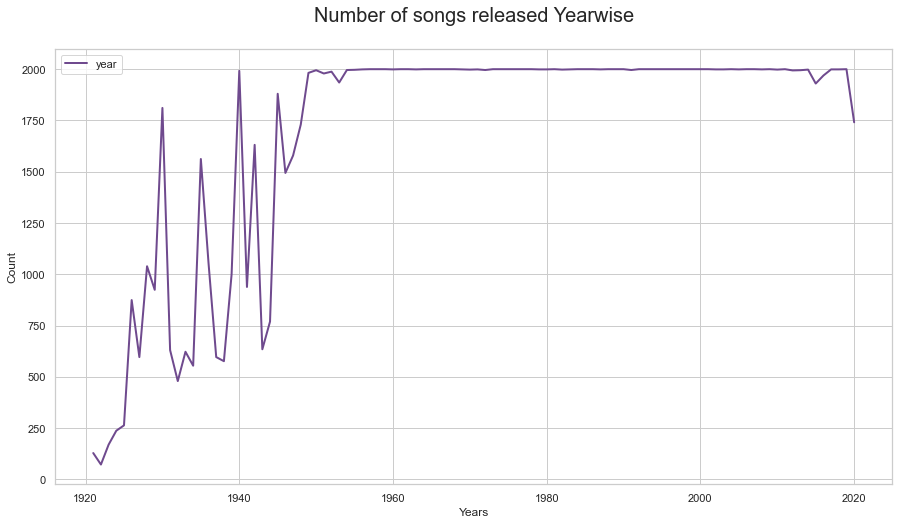

In [77]:
# So it seems like the only one under the top 5 most productive artists who is also one of the top 5 most popular artists is Frank Sinatra.
# Since most of the popular and most productive artists seem to be a little older, let's check the number of songs released yearwise.

year = pd.DataFrame(df_data['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(15,8) ,color='#6f4a8e', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

In [78]:
# It seems like the number of songs released yearwise was fluctuating from the 1920s to the 1950s and then stabilizes itself for nearly 50 years.

/Users/lf/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lf/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lf/Anaconda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

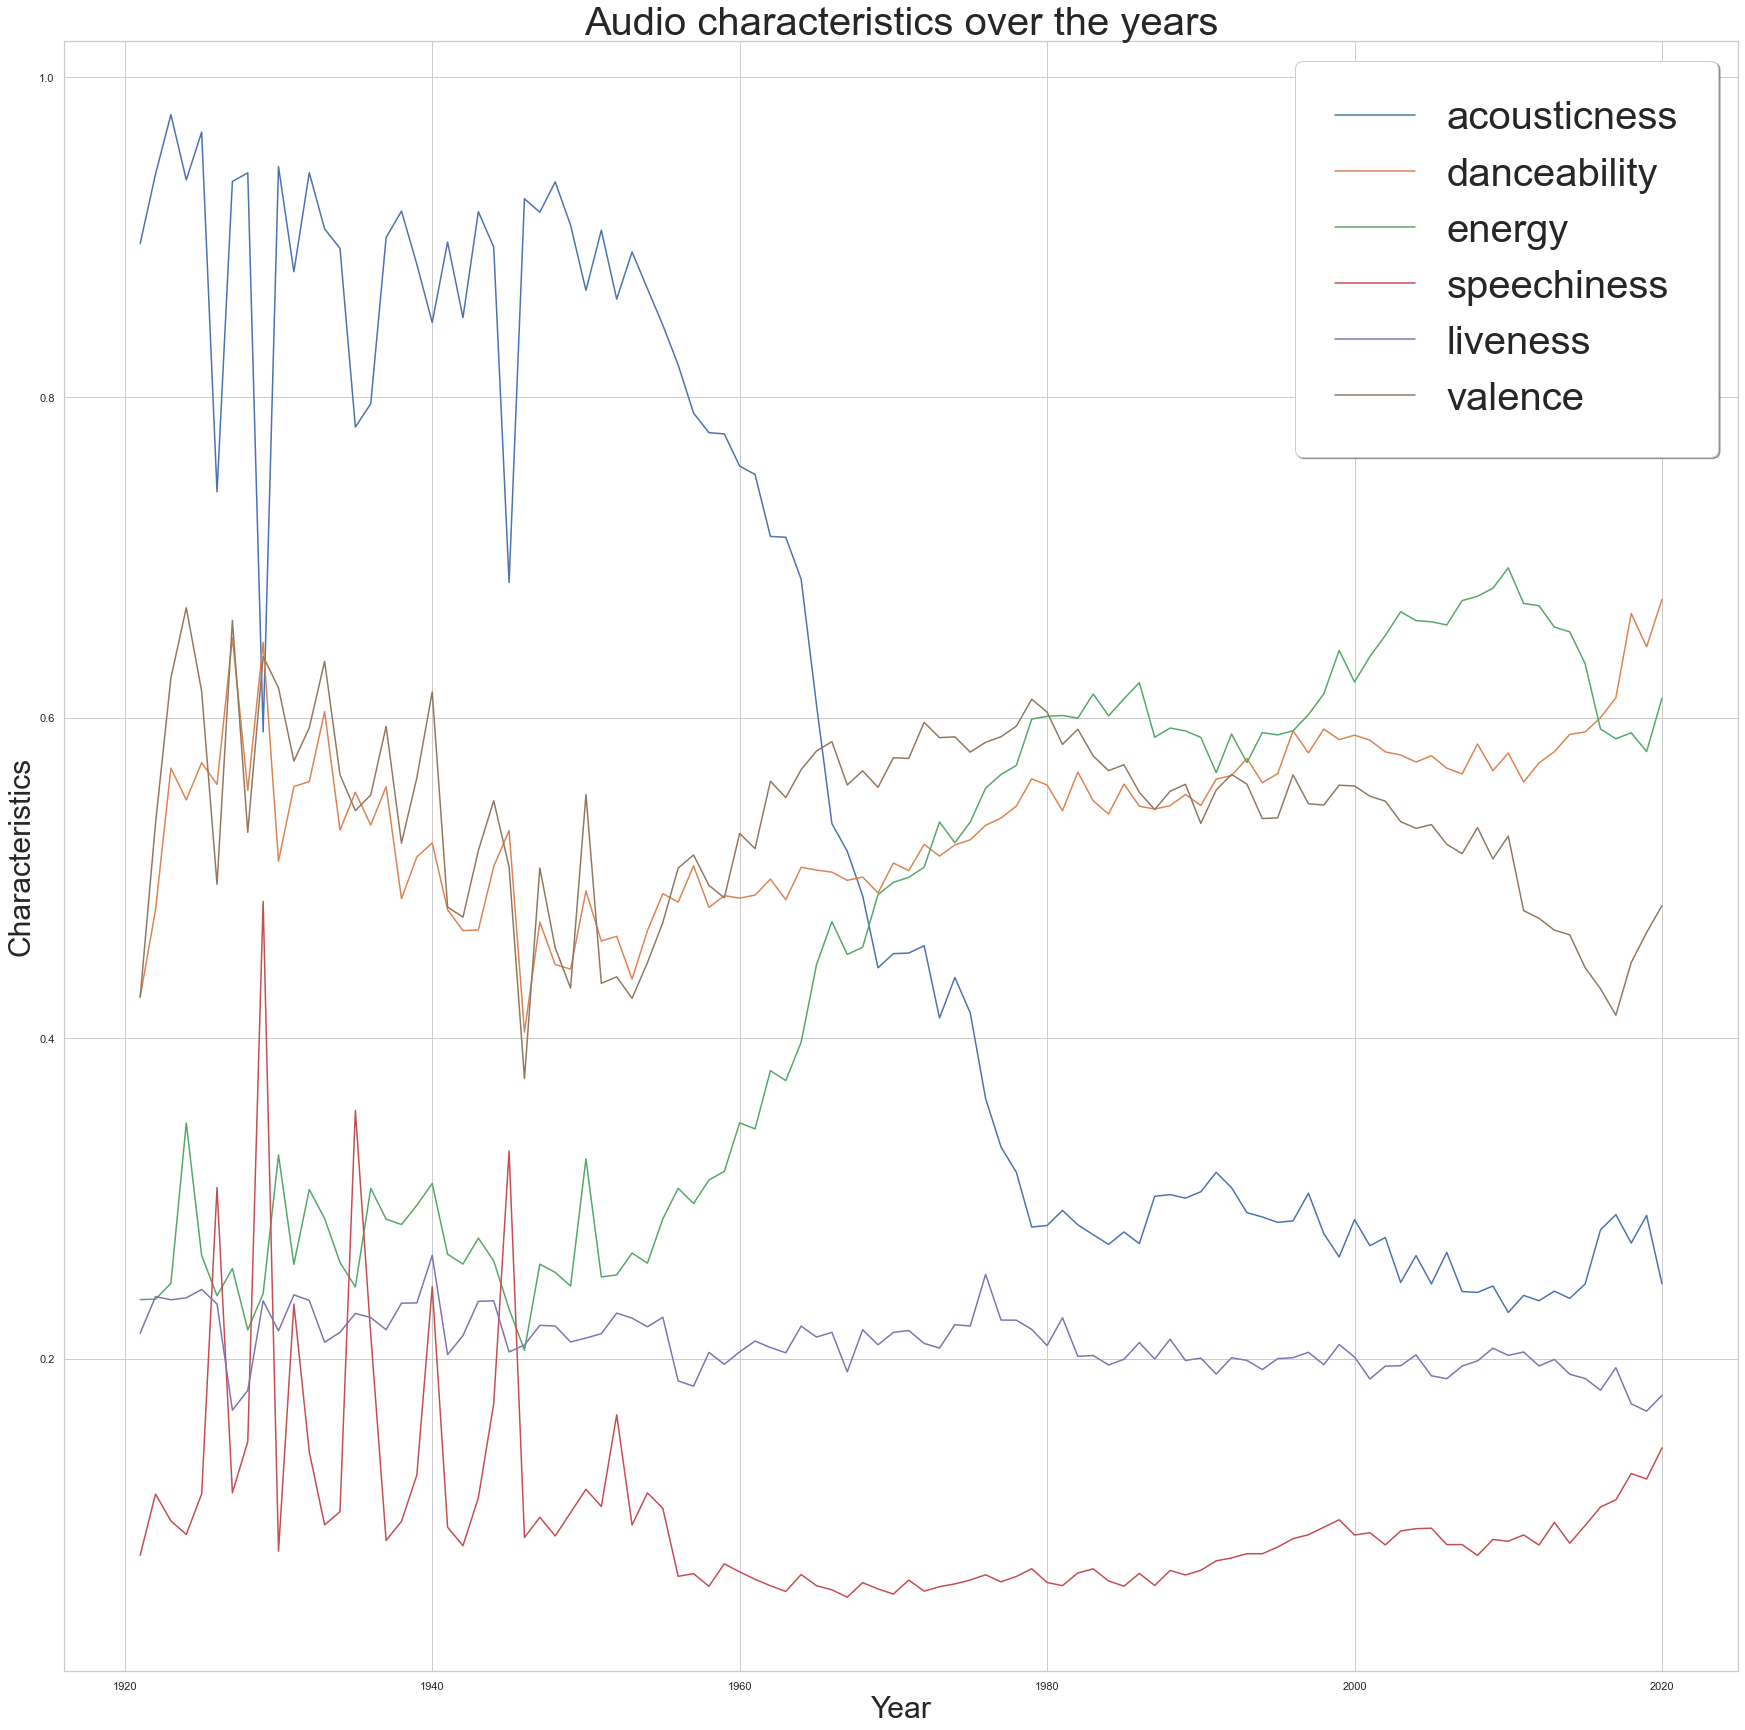

In [79]:
# Step 4: How did the audio parameters we already know develop through time?
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(30,30))
for c in columns:
    x = df_data.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 40}, loc = 'upper right')
plt.show()

Over the Years we can see an increase for Danceability and Energy and a decrease for Acousticness.

- Acousticness has decreased significantly. (Most tracks past 1960 used electric instruments and, especially past the 1980s, electronic sounds. Most recorded music today includes both electric and electronic elements.)

- Danceability has varied significantly, but has stayed mostly at the same level since 1980.

- Energy seems to be related to acousticness: Was very low in the first part of the century, but then rose signficantly after 1960. It looks like it increased even more after 2000 as well.

- Speechiness looks like it varied a lot in the first part of the 20th century, but then settled low around 1960. Note we do see a slight increase after 1980. This is likely due to the growth of rap music. Mostly music, however, is still mostly sung.

- Liveness looks like it has always stayed relatively low. Most recorded music on Spotify was made with not audience present.

- Valence seems to have risen until 2000 with energy and danceability, but has fallen since.


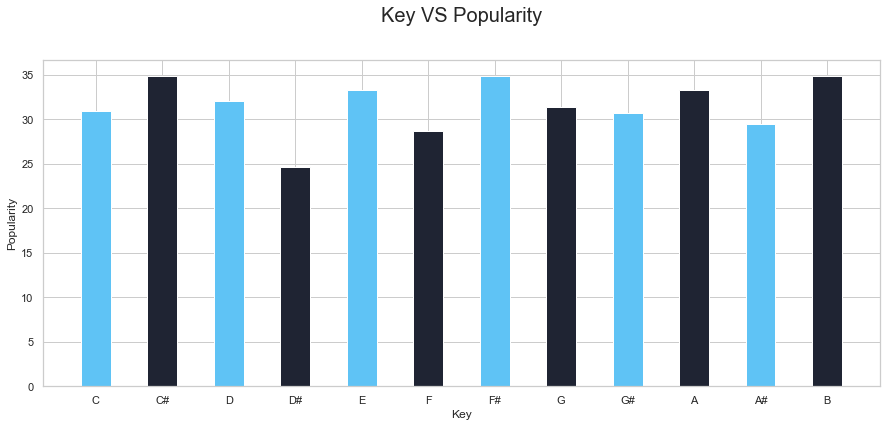

In [81]:
# So let's check the key of a song for it's significance when it comes to popularity next.
keypop = pd.DataFrame(df_data.groupby('key')['popularity'].mean()).reset_index()
keypop.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

fig = plt.figure(figsize=(15,6))
plt.bar( keypop['key'],
         keypop['popularity'],
         width=0.45,
         color = ['#5fc3f5','#1f2433']) # #5fc3f5 , #1f2433
plt.title('Key VS Popularity',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Popularity')
ax.axes.get_xaxis().set_visible(True)

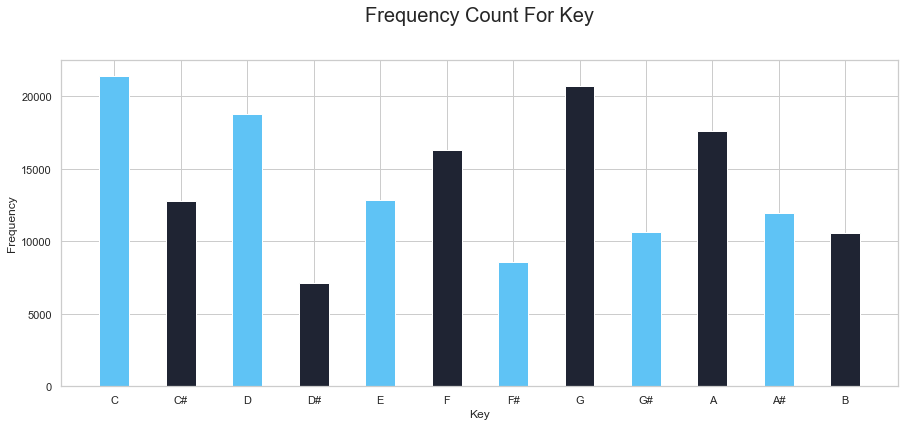

In [82]:
key = pd.DataFrame(df_data['key'].value_counts()).reset_index().sort_values('index')
key.replace({'index' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
fig = plt.figure(figsize=(15,6))
plt.bar( key['index'],
         key['key'],
         width=0.45,
         color = ['#5fc3f5','#1f2433'])
plt.title('Frequency Count For Key',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Frequency')
ax.axes.get_xaxis().set_visible(True)

**Next Topics:** 
- Implementing a Decision Tree Classifier with scikit-learn.
- Visualize the Decision Tree Classifier using different visualization tools.

We will proceed by building a Decision Tree and seem if we can predict whether or not the random user would like the song from the test-set based on data from the training set. <br>

Just a short recap here: We already used sci-kit learns train_test_split method above to easily define the test and training data. This means that the method will already select data from our total dataset df_main2 and then split it out into 15% test-data and 85% as a base to be trained upon (train, test = train_test_split(df_main2, test_size = 0.15).

So let's go with the decision tree. <br>

What a decision tree is doing, is asking a very specific set of questions about the dataset that it receives. This might mean, that it is for example asking, if the daceability of a song is greater than .6 or not. Depending on the true/false decisions it adds on more questions, becoming the final decision tree.

In [43]:
# Define Variable c = DecisionTreeClassifier with min_samples_split.
# min_samples_split = The minimum amount of samples that are required to split the nodes.
# the finer grated the min_samples_split, the denser the tree and it's "decision-leaves".
# too fine grated min_sample_splits might lead to overfitting.
# overfitting = the algoithm hypothesizes is too specifically about the training data...
# ... thus reducing training error at the expense of increased error in the test set.
c = DecisionTreeClassifier(min_samples_split=100)

In [44]:
# Define a set of features that we want the decision tree classifier to consider.

features = ["danceability", "duration_ms", "loudness", "speechiness", "valence", "energy", "key", "acousticness", "instrumentalness"]

In [45]:
# define training-set from pd-dataframe.
# select all the features.

x_train = train[features]

# set the target-value as y-train.

y_train = train["target"]

# repeat for test-set.

x_test = test[features]
y_test = test["target"]

In [46]:
# Start building the Decision Tree.
DT = c.fit(x_train, y_train)

In [47]:
# Visualize the DT using graphviz (pip install graphviz)
# %pip install graphviz
# %pip install pydotplus

In [48]:
# import graphviz and other additional modules.
import graphviz
import pydotplus
import io
from scipy import misc
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [49]:
# To visualize we will use a function:
def show_tree(tree, features, path): 
    f = io.StringIO() # use pythons IO.
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path) # read image from file as array.
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

In [50]:
show_tree(DT, features, 'DT_01.png')

InvocationException: GraphViz's executables not found

In [ ]:
y_pred = c.predict(x_test)

In [ ]:
y_pred

In [ ]:
# What exactly is happening here?
# the .predict method is taking a peek into each of the values for each of the features in the DT.
# It is then running the DT-Algorithm until it classifies those to a 1 or 0.

# In a next step let us check the accuracy.
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100
print("Accuracy (DT): " , round(score,1), "%")

In [ ]:
# just to compare we are changing the min_samples_split to 2.
c = DecisionTreeClassifier(min_samples_split=2)
features = ["danceability", "duration_ms", "loudness", "speechiness", "valence", "energy", "key", "acousticness", "instrumentalness"]

x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

DT_02 = c.fit(x_train, y_train)

import graphviz
import pydotplus
import io
from scipy import misc
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def show_tree(tree, features, path): 
    f = io.StringIO() # use pythons IO.
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path) # read image from file as array.
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)
    
show_tree(DT_02, features, 'DT_02.png')

In [ ]:
y_pred = c.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100
print("Accuracy (DT_02): " , round(score,1), "%")

In [ ]:
# As we can see it performs slighty worse on the test-data.